# Pandas Basics <hr style="border:2.5px solid #FF69B4 "></hr>

Data Analyst: Rosemae A. Samillano <br>
Department: Electrical Engineering

In [72]:
# %pip install matplotlib --upgrade

In [73]:
# %pip install pandas --upgrade



In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [75]:
rosie = {
    "name":['Henry', 'Owen', 'Ada'],
    "age":[22, 35, 58],
    "sex":['M', 'M', 'F']
}
rosie

{'name': ['Henry', 'Owen', 'Ada'], 'age': [22, 35, 58], 'sex': ['M', 'M', 'F']}

In [76]:
info = pd.DataFrame(rosie)
info

,name,age,sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


In [77]:
info["age"]

0    22
1    35
2    58
Name: age, dtype: int64

In [78]:
info["age"].sum()

np.int64(115)

In [79]:
info["age"].mean()

np.float64(38.333333333333336)

# Correlation

In [80]:
device = {
    "current":[2, 3.5, 1.8, 4.2, 2.7],
    "power":[100, 200, 90, 210, 110]
}
device

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [81]:
df = pd.DataFrame(device)
df

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [82]:
df.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [83]:
df.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [84]:
df.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter plot

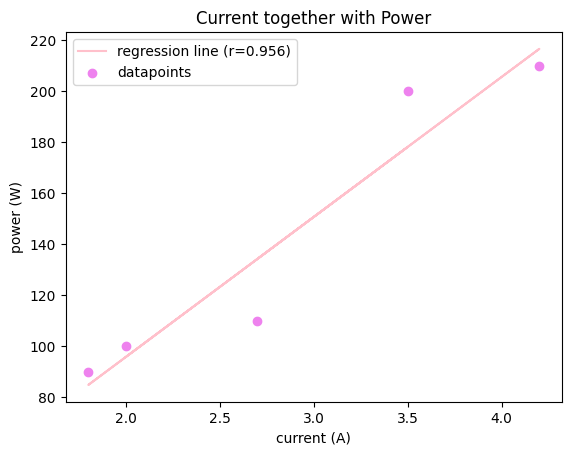

In [85]:
x = df["current"]
y = df["power"]

# regression Line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x, line,
         color = "pink",
         label = f'regression line (r={r_value:.3f})')

plt.scatter(x,y,
            color = "violet",
            label = "datapoints")

plt.title("Current together with Power")
plt.ylabel("power (W)")
plt.xlabel("current (A)")
plt.legend()
plt.show()

# Resistance Test

In [86]:
resistance = pd.read_csv(r"resistance-test (1).csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [87]:
resistance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [88]:
daisy = pd.DataFrame(resistance)
daisy

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [89]:
resistance["Jaguar"].mean()

np.float64(9.399999999999999)

In [90]:
pan_mean = resistance["Panther"].mean()
pan_mean

np.float64(10.75)

In [91]:
resistance["Panther"]. fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [92]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [93]:
resistance["Panther"] = resistance["Panther"]. fillna(pan_mean)
resistance["Panther"]

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [94]:
jag_mean = resistance["Jaguar"].mean()
jag_mean

np.float64(9.399999999999999)

# Bar Graph

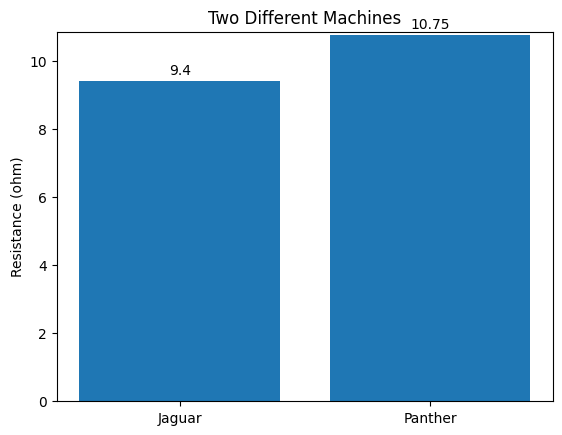

In [95]:
bars = plt.bar(["Jaguar","Panther"],[jag_mean,pan_mean])
plt.title("Two Different Machines")
plt.ylabel("Resistance (ohm)")

plt.bar_label(bars, padding=3)
plt.margins(y=0.01) # 10%
plt.show()

